# SALES FORECASTING TRHOUGH LINEAR REGRESSION MODEL & PREDICTING LOAN DEFAULT USING RANDOM FOREST CLASSIFIER



In [2]:

#SALES FORECASTING TRHOUGH LINEAR REGRESSION MODEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,
 confusion_matrix

# Load the dataset
df = pd.read_csv("D:/victoriaSolutions/raw_dataset_week4.csv")
print("Dataset loaded successfully.")

            
# Display the first few rows and check for basic info
print("\n--- Initial Data Info ---")
print(df.head())
print(df.info())

Dataset loaded successfully.

--- Initial Data Info ---
   Customer_ID  Age  Gender    Income  Spending_Score  Credit_Score  \
0            1   56  Female  142418.0               7         391.0   
1            2   69    Male   63088.0              82         652.0   
2            3   46    Male  136868.0              91         662.0   
3            4   32  Female       NaN              34         644.0   
4            5   60    Male   59811.0              91         469.0   

   Loan_Amount  Previous_Defaults  Marketing_Spend  Purchase_Frequency  \
0       8083.0                  1            15376                   3   
1      34328.0                  2             6889                   6   
2      47891.0                  2             6054                  29   
3      25103.0                  2             4868                   8   
4      44891.0                  1            17585                  12   

  Seasonality  Sales  Customer_Churn  Defaulted  
0         Low  32526  

In [3]:
#Handle Missing values
print(df.isnull().sum())

Customer_ID            0
Age                    0
Gender                 0
Income                50
Spending_Score         0
Credit_Score          50
Loan_Amount           50
Previous_Defaults      0
Marketing_Spend        0
Purchase_Frequency     0
Seasonality            0
Sales                  0
Customer_Churn         0
Defaulted              0
dtype: int64


In [6]:

print(df.dtypes)


Customer_ID             int64
Age                     int64
Gender                 object
Income                float64
Spending_Score          int64
Credit_Score          float64
Loan_Amount           float64
Previous_Defaults       int64
Marketing_Spend         int64
Purchase_Frequency      int64
Seasonality            object
Sales                   int64
Customer_Churn          int64
Defaulted               int64
dtype: object


In [8]:
# Fill missing numerical values with the mean of the column
for column in df.select_dtypes(include=np.number).columns:
 df[column] = df[column].fillna(df[column].mean())

In [9]:
print(df.isnull().sum())

Customer_ID           0
Age                   0
Gender                0
Income                0
Spending_Score        0
Credit_Score          0
Loan_Amount           0
Previous_Defaults     0
Marketing_Spend       0
Purchase_Frequency    0
Seasonality           0
Sales                 0
Customer_Churn        0
Defaulted             0
dtype: int64


In [11]:
# Select only the numerical columns for outlier detection
numeric_df = df.select_dtypes(include=np.number)

# Get the initial number of rows
initial_rows = len(df)

# Calculate Q1, Q3, and IQR for the numerical data
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask to identify rows with outliers in any numerical column
# This mask is based on the numeric_df, not the original df
outlier_mask = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)

# Filter the original DataFrame to keep only the rows without outliers
df = df[~outlier_mask]
final_rows = len(df)

print(f"Removed {initial_rows - final_rows} rows containing outliers.")

# Save the cleaned dataset
cleaned_file_path = "D:/victoriaSolutions/cleaned_sales_data.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to '{cleaned_file_path}'")

Removed 95 rows containing outliers.
Cleaned dataset saved to 'D:/victoriaSolutions/cleaned_sales_data.csv'


In [16]:
df = pd.read_csv(cleaned_file_path)
df.head()

,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,1,56,Female,142418.000000,7,391.0,8083.0,1,15376,3,Low,32526,0,0
1,2,69,Male,63088.000000,82,652.0,34328.0,2,6889,6,Low,78493,0,0
2,3,46,Male,136868.000000,91,662.0,47891.0,2,6054,29,Medium,57198,1,0
3,4,32,Female,84398.055556,34,644.0,25103.0,2,4868,8,Medium,48395,0,0
4,5,60,Male,59811.000000,91,469.0,44891.0,1,17585,12,High,29031,1,0



--- Generating Visualizations ---


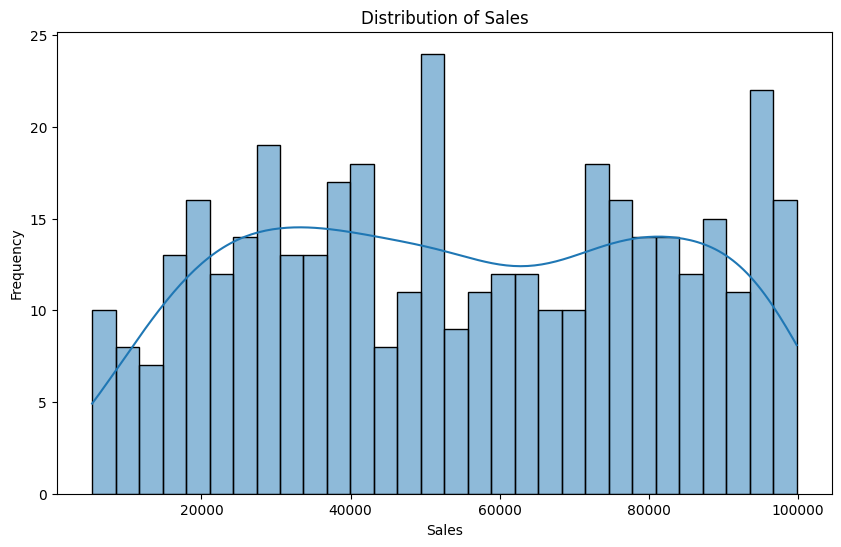

In [18]:
print("\n--- Generating Visualizations ---")

# Create the histogram for Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.savefig('sales_distribution.png')
plt.show()


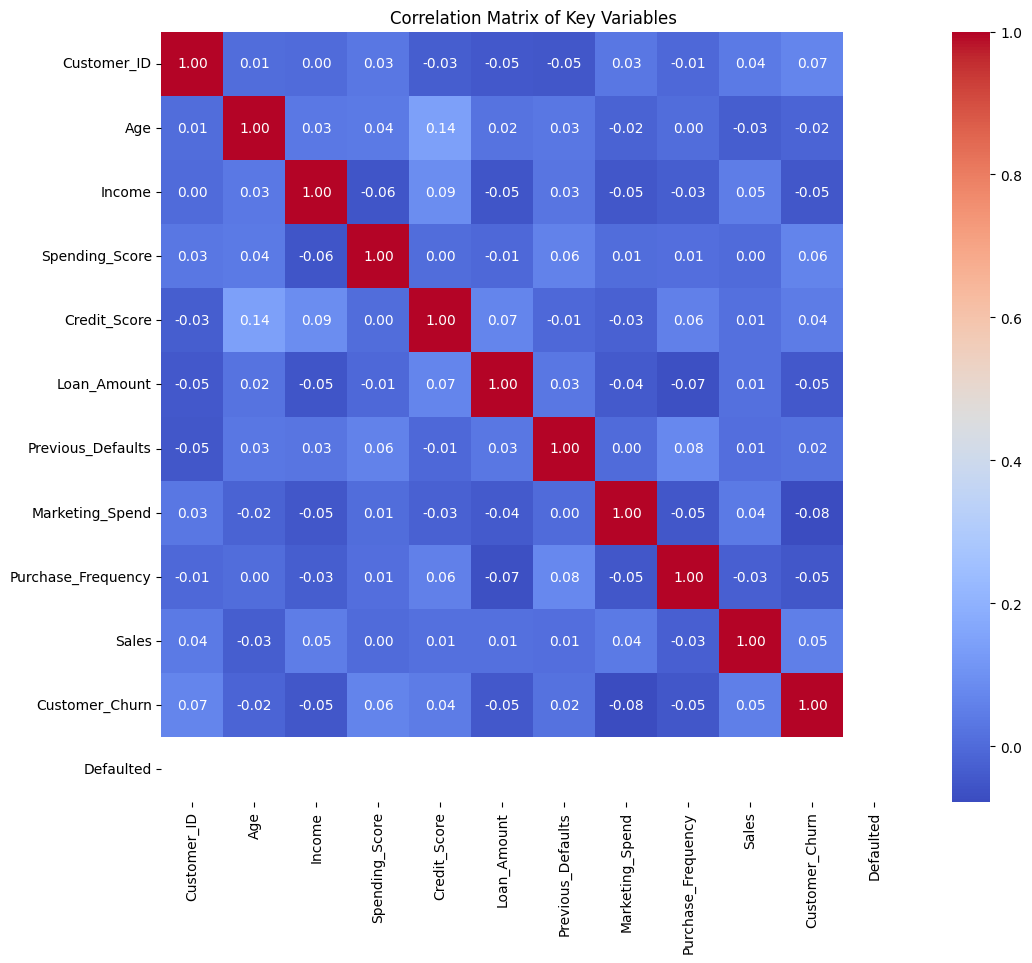

In [19]:
# 2. Correlation Matrix (Heatmap)
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.savefig('2_correlation_matrix.png')
plt.show()

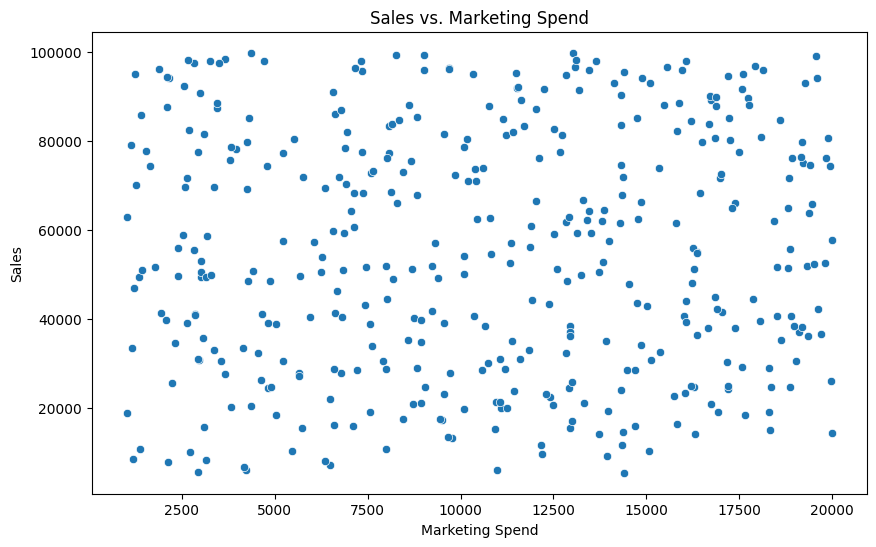

In [20]:
# 3. Sales vs. Marketing Spend (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing_Spend', y='Sales', data=df)
plt.title('Sales vs. Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.savefig('3_sales_vs_marketing.png')
plt.show()

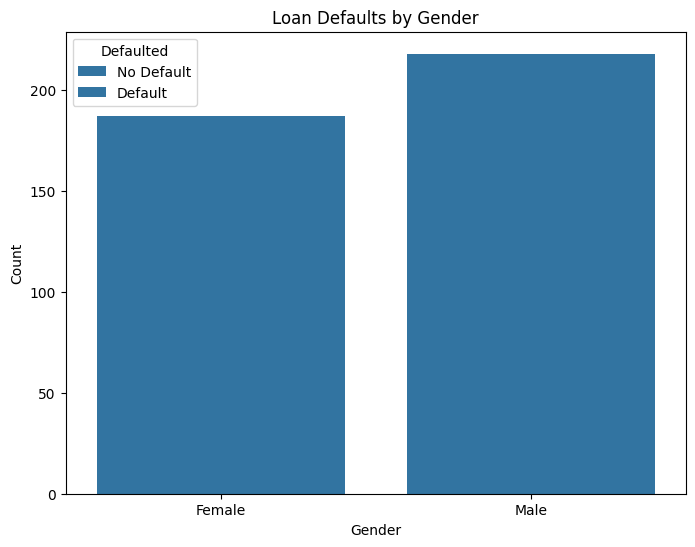

In [21]:
#4. Loan Default Analysis by Customer Demographics (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Defaulted', data=df)
plt.title('Loan Defaults by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Defaulted', labels=['No Default', 'Default'])
plt.savefig('4_defaults_by_gender.png')
plt.show()


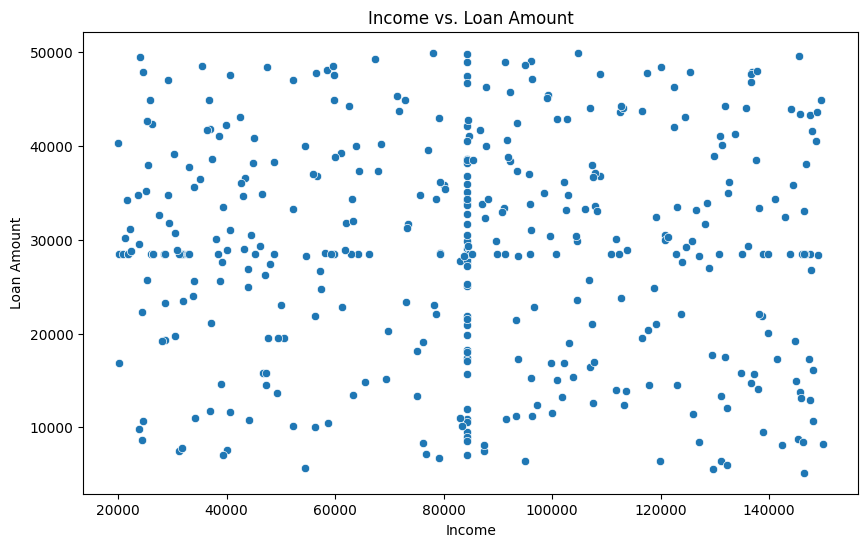

In [22]:
# 5. Income vs. Loan Amount (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Loan_Amount', data=df)
plt.title('Income vs. Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.savefig('5_income_vs_loan_amount.png')
plt.show()

In [23]:
#PREDICTIVE ANALYTICS
#We will train a linear regression model to predict sales based on other key factors like marketing spend.

print("\n--- Training a Predictive Model (Sales Forecasting) ---")

# Define features (X) and target (y)
# Adjust these column names to match your dataset
features = ['Marketing_Spend', 'Customer_ID', 'Loan_Amount'] # Example features
try:
    X = df[features]
    y = df['Sales']
except KeyError as e:
    print(f"Error: Missing column {e}. Please update the feature names.")
    exit()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Model Mean Squared Error (MSE): {mse:.2f}")
print(f"Model Root Mean Squared Error (RMSE): {rmse:.2f}")

# Extract model insights
feature_importance = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\n--- Feature Importance (Coefficients) ---")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


--- Training a Predictive Model (Sales Forecasting) ---
Model Mean Squared Error (MSE): 763919292.95
Model Root Mean Squared Error (RMSE): 27639.09

--- Feature Importance (Coefficients) ---
                 Coefficient
Customer_ID         9.897266
Marketing_Spend     0.235333
Loan_Amount         0.035723


# PREDICTING LOAN DEFAULT USING RANDOM FOREST CLASSIFIER


Dataset loaded successfully.
   Customer_ID  Age  Gender    Income  Spending_Score  Credit_Score  \
0            1   56  Female  142418.0               7         391.0   
1            2   69    Male   63088.0              82         652.0   
2            3   46    Male  136868.0              91         662.0   
3            4   32  Female       NaN              34         644.0   
4            5   60    Male   59811.0              91         469.0   

   Loan_Amount  Previous_Defaults  Marketing_Spend  Purchase_Frequency  \
0       8083.0                  1            15376                   3   
1      34328.0                  2             6889                   6   
2      47891.0                  2             6054                  29   
3      25103.0                  2             4868                   8   
4      44891.0                  1            17585                  12   

  Seasonality  Sales  Customer_Churn  Defaulted  
0         Low  32526               0          0  

C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

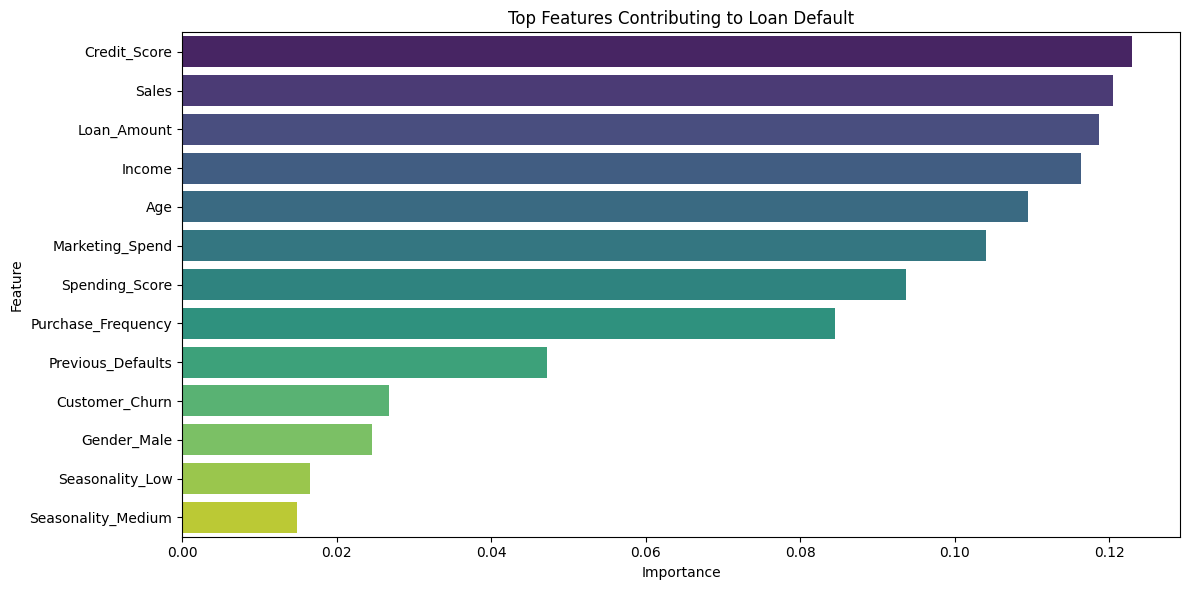

Step 5: Predicting New Customer Default Risk
✅ Low Default Risk: Safe to approve loan.


In [13]:
#Predicting Loadn Default using random forest classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
try:
    df = pd.read_csv("D:/victoriaSolutions/raw_dataset_week4.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'cleaned_sales_data.csv' was not found.")
    exit()

print(df.head())
print("-" * 50)

# Step 2: Data Preprocessing
# Drop irrelevant column
df.drop(columns=['Customer_ID'], inplace=True)

# Drop missing values (you could also use imputation here)
df.dropna(inplace=True)

# Separate target and features
X = df.drop(columns=['Defaulted'])  # Features
y = df['Defaulted']                 # Target

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Gender', 'Seasonality'], drop_first=True)

# Train-test split (before scaling!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Step 2: Data Preprocessing Completed")
print(f"Training samples: {X_train_scaled.shape[0]}, Testing samples: {X_test_scaled.shape[0]}")
print("-" * 50)

# Step 3: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Step 3: AI Model Training and Evaluation")
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("-" * 50)

# Step 4: Feature Importance (Corrected)
importances = model.feature_importances_
feature_names = X.columns

# Safety check
if len(importances) != len(feature_names):
    print("Mismatch in importances and feature names!")
    print(f"Importances length: {len(importances)}, Features length: {len(feature_names)}")
else:
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Filter out zero importance (optional)
    importance_df = importance_df[importance_df['Importance'] > 0]

    # Sort
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    # Check if there's anything to plot
    if importance_df.empty:
        print("All feature importances are zero. Nothing to plot.")
    else:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
        plt.title("Top Features Contributing to Loan Default")
        plt.tight_layout()
        plt.savefig("feature_importance.png")
        plt.show()


# Step 5: Predict new customer default risk
# Ensure the same feature structure as training data
new_customer_input = {
    'Age': 35,
    'Income': 55000,
    'Spending_Score': 50,
    'Credit_Score': 650,
    'Loan_Amount': 20000,
    'Previous_Defaults': 0,
    'Marketing_Spend': 100,
    'Purchase_Frequency': 5,
    'Sales': 100000,
    'Customer_Churn': 1,
    'Gender_male': 1,         # 1 if male, 0 if female
    'Seasonality_Low': 0,     # One-hot encoded column
    'Seasonality_Medium': 1   # One-hot encoded column
}

# Prepare new customer input as a DataFrame aligned with training columns
new_customer_df = pd.DataFrame(columns=X.columns)
new_customer_df.loc[0] = [new_customer_input.get(col, 0) for col in X.columns]

# Standardize using the same scaler
new_customer_scaled = scaler.transform(new_customer_df)

# Predict
prediction = model.predict(new_customer_scaled)

print("Step 5: Predicting New Customer Default Risk")
if prediction[0] == 1:
    print("🚨 High Default Risk: Consider stricter loan approval criteria!")
else:
    print("✅ Low Default Risk: Safe to approve loan.")
